In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, recall_score, precision_score, f1_score, matthews_corrcoef, roc_curve, auc
import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings("ignore")

import os

In [17]:
df = pd.read_csv('ai4i2020.csv')
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [18]:
df.columns = df.columns.str.replace('[','').str.replace(']','')
df.head()

,UDI,Product ID,Type,Air temperature K,Process temperature K,Rotational speed rpm,Torque Nm,Tool wear min,Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [19]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
UDI,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
Product ID,10000,10000,M14860,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,10000,3,L,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Air temperature K,10000.0,NaN,NaN,NaN,300.00493,2.000259,295.3,298.3,300.1,301.5,304.5
Process temperature K,10000.0,NaN,NaN,NaN,310.00556,1.483734,305.7,308.8,310.1,311.1,313.8
Rotational speed rpm,10000.0,NaN,NaN,NaN,1538.7761,179.284096,1168.0,1423.0,1503.0,1612.0,2886.0
Torque Nm,10000.0,NaN,NaN,NaN,39.98691,9.968934,3.8,33.2,40.1,46.8,76.6
Tool wear min,10000.0,NaN,NaN,NaN,107.951,63.654147,0.0,53.0,108.0,162.0,253.0
Machine failure,10000.0,NaN,NaN,NaN,0.0339,0.180981,0.0,0.0,0.0,0.0,1.0
TWF,10000.0,NaN,NaN,NaN,0.0046,0.067671,0.0,0.0,0.0,0.0,1.0


In [20]:
# Handling invalid data

df.replace("?",np.nan,inplace=True)
for column in df.columns:
    try:
        df[column]=df[column].astype(float)
    except:
        pass
    
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.replace([np.inf, -np.inf], np.nan, inplace=True)

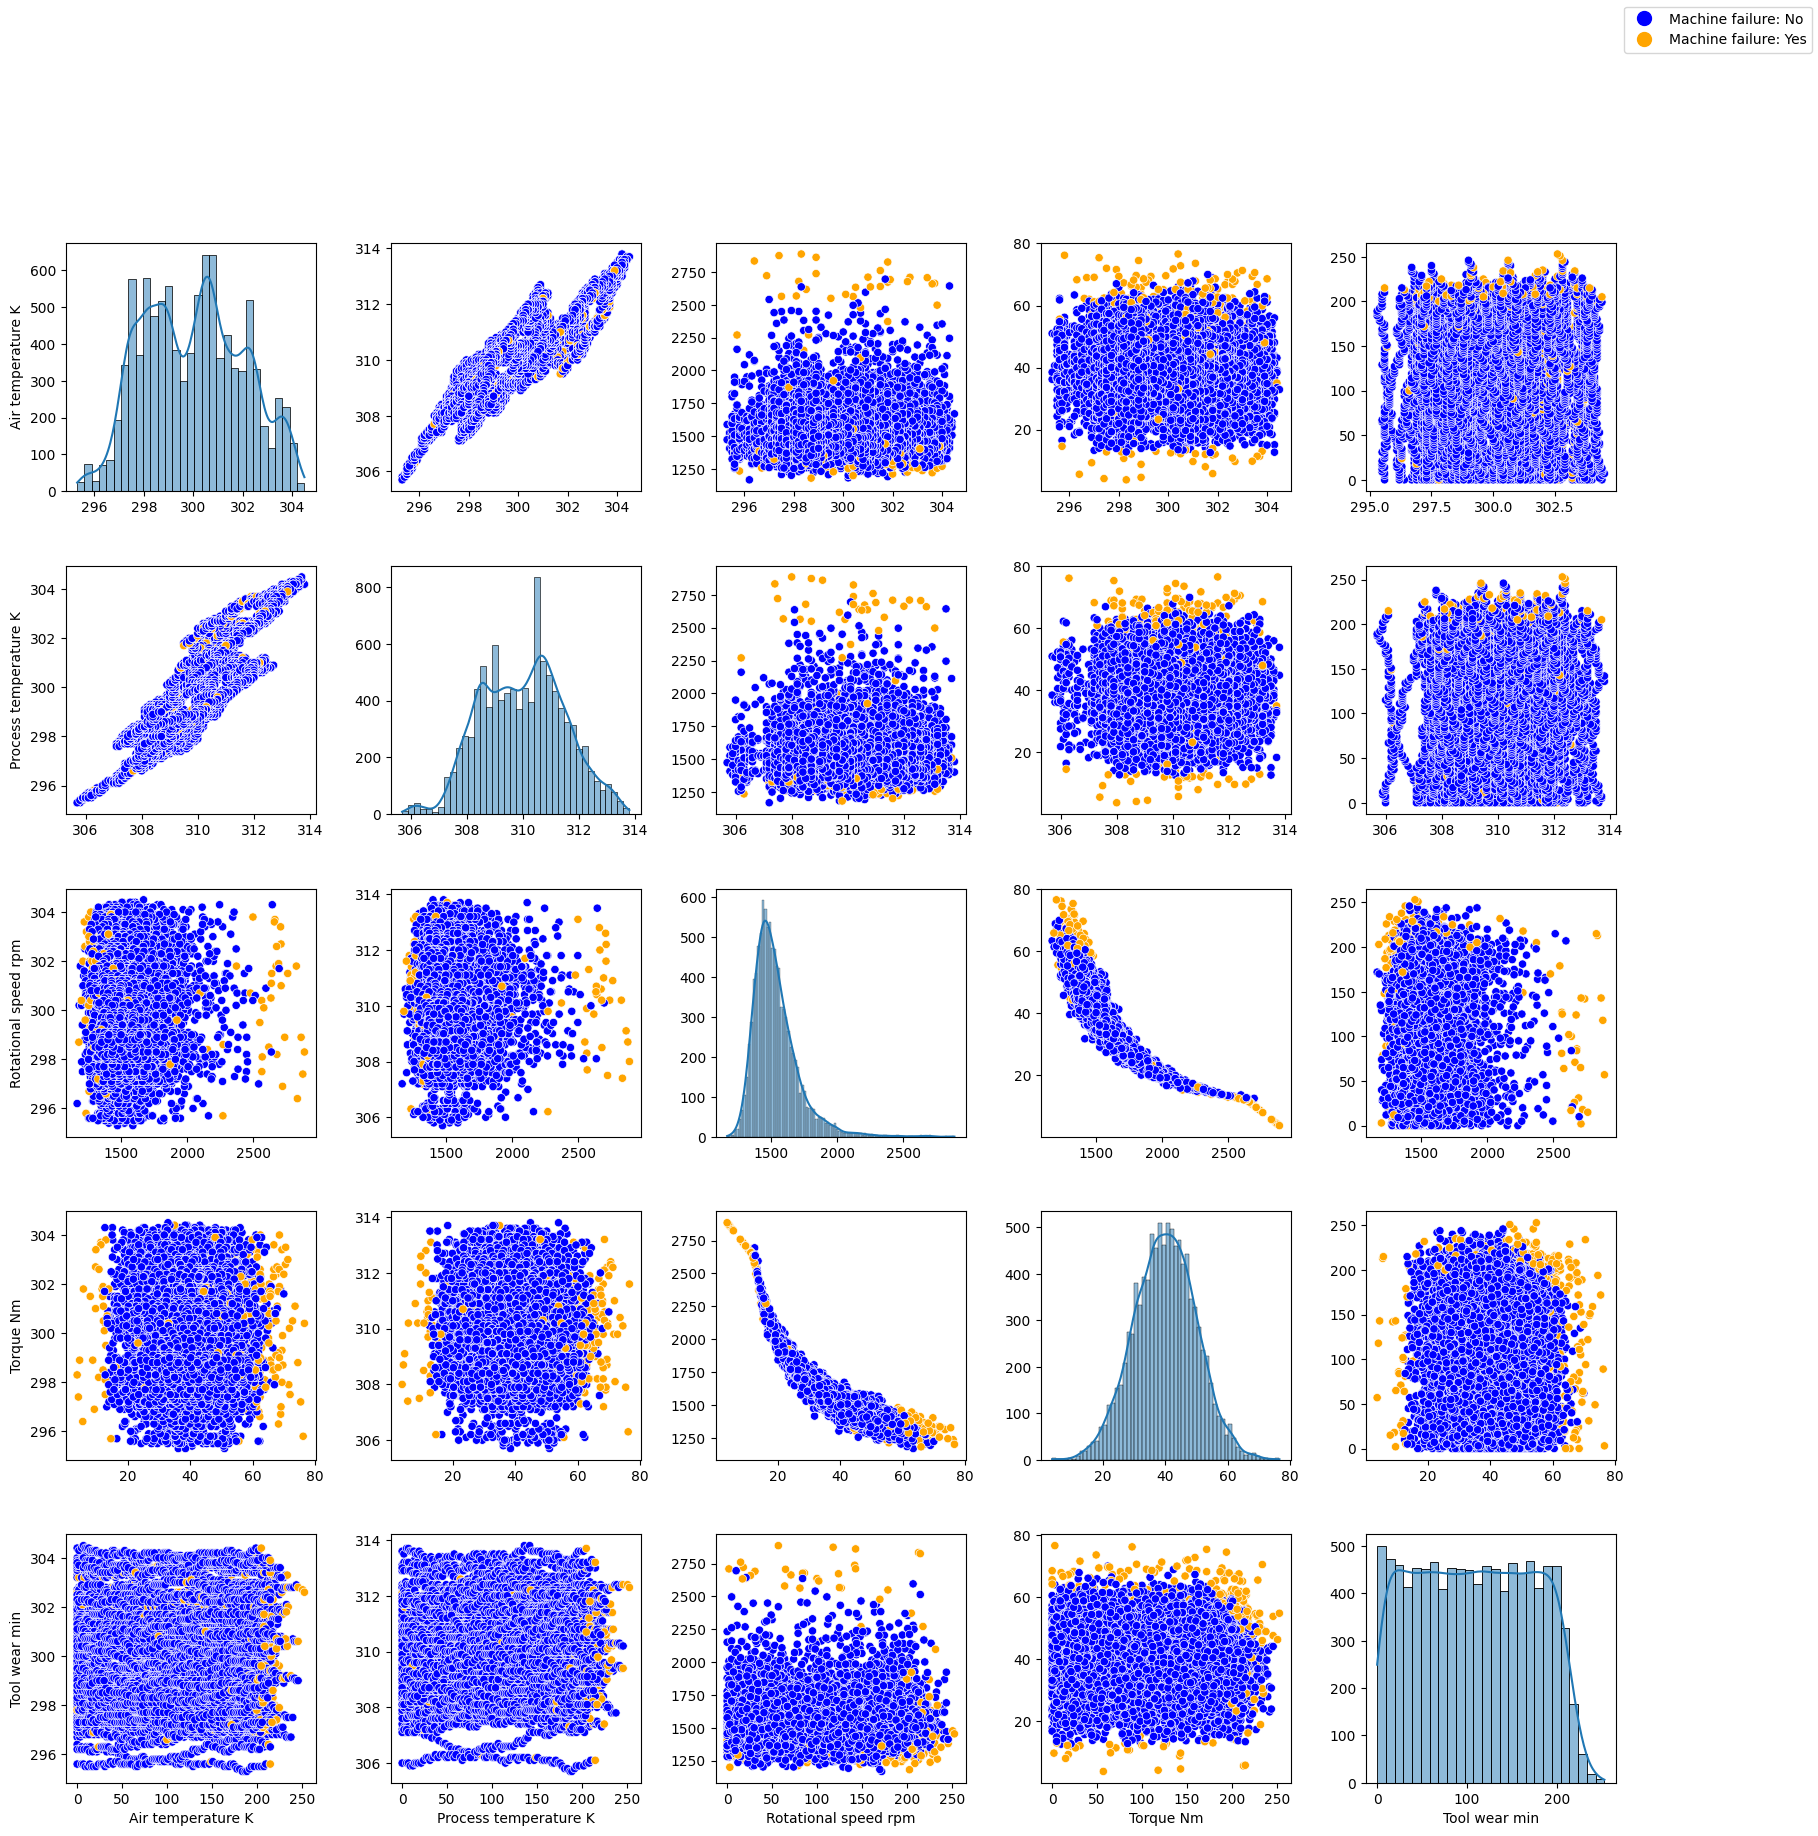

In [21]:
# List of numerical features to be analyzed, based on the dataset description 
numerical_features = [
    'Air temperature K', 
    'Process temperature K', 
    'Rotational speed rpm', 
    'Torque Nm', 
    'Tool wear min'
]

# Creating subplots
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=len(numerical_features), figsize=(20, 20))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

# Plotting pairwise correlations
for i, feature1 in enumerate(numerical_features):
    for j, feature2 in enumerate(numerical_features):
        ax = axes[i, j]
        if i == j:
            sns.histplot(df_numeric[feature1], kde=True, ax=ax)
        else:
            sns.scatterplot(
                x=df_numeric[feature1], 
                y=df_numeric[feature2], 
                hue=df['Machine failure'], 
                palette={0: 'blue', 1: 'orange'},
                ax=ax,
                legend = False
            )
        if i == len(numerical_features) - 1:
            ax.set_xlabel(feature2)
        else:
            ax.set_xlabel('')
        if j == 0:
            ax.set_ylabel(feature1)
        else:
            ax.set_ylabel('')
            
custom_lines = [Line2D([0], [0], color='blue', lw=0, marker='o', markersize=10),
                Line2D([0], [0], color='orange', lw=0, marker='o', markersize=10)]

fig.legend(custom_lines, ['Machine failure: No', 'Machine failure: Yes'], loc='upper right',frameon=True, facecolor='white')

plt.show()

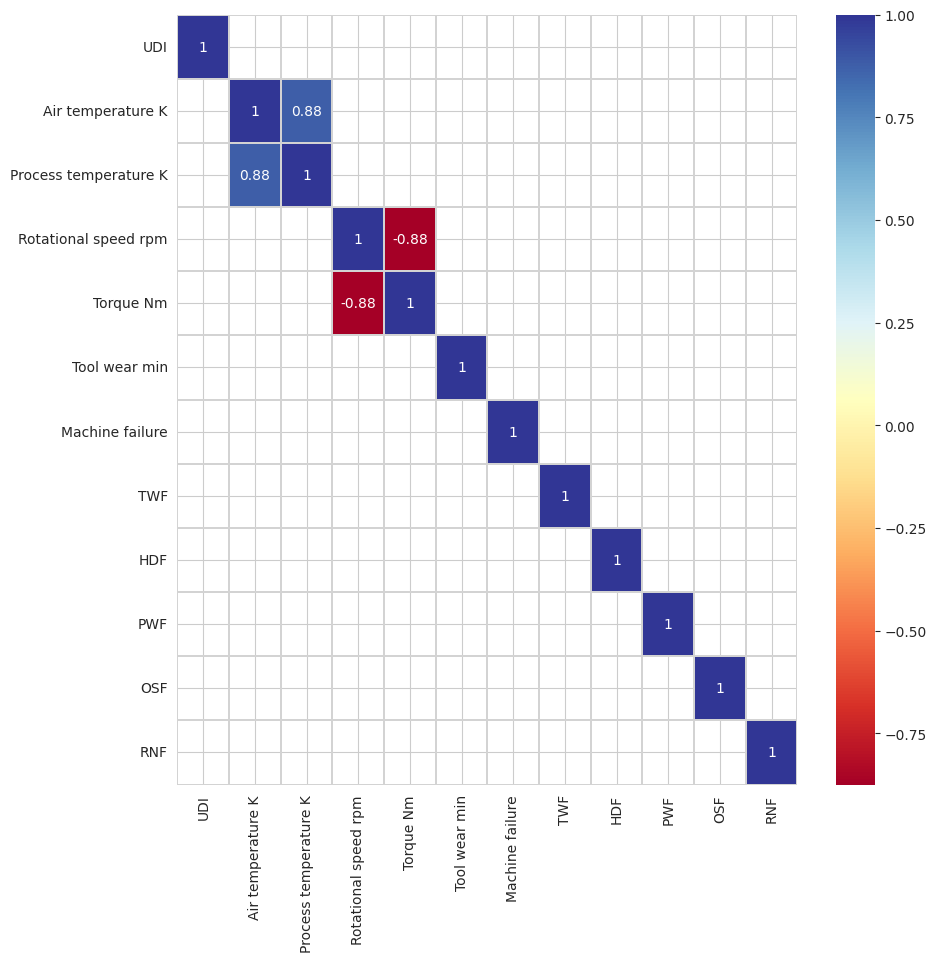

In [22]:
plt.figure(figsize=(10,10))
threshold = 0.80
sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster2 = df_numeric.corr()
mask = df_cluster2.where((abs(df_cluster2) >= threshold)).isna()
plot_kws={"s": 1}
sns.heatmap(df_cluster2,
            cmap='RdYlBu',
            annot=True,
            mask=mask,
            linewidths=0.2, 
            linecolor='lightgrey').set_facecolor('white')

In [23]:
df.drop(['UDI','Product ID','TWF','HDF','PWF','OSF','RNF','Type'],axis=1,inplace=True)
list(df)

['Air temperature K',
 'Process temperature K',
 'Rotational speed rpm',
 'Torque Nm',
 'Tool wear min',
 'Machine failure']

In [26]:
df = pd.get_dummies(df,drop_first=True)
features = list(df.columns)
df_group = df.groupby(['Machine failure'])
# df_group

In [27]:
df_numeric.fillna(df_numeric.mean(),inplace=True)

for feature in features:
    try:
        df.fillna({feature : df[feature].mean()}, inplace=True)
    except:
        try:
            df.fillna({feature : df[feature].mode()}, inplace=True)
        except:
            pass

In [28]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Air temperature K,10000.0,300.00493,2.000259,295.3,298.3,300.1,301.5,304.5
Process temperature K,10000.0,310.00556,1.483734,305.7,308.8,310.1,311.1,313.8
Rotational speed rpm,10000.0,1538.77610,179.284096,1168.0,1423.0,1503.0,1612.0,2886.0
Torque Nm,10000.0,39.98691,9.968934,3.8,33.2,40.1,46.8,76.6
Tool wear min,10000.0,107.95100,63.654147,0.0,53.0,108.0,162.0,253.0
Machine failure,10000.0,0.03390,0.180981,0.0,0.0,0.0,0.0,1.0


Selecting the best features contributing to the target

In [32]:
from sklearn.feature_selection import SelectKBest, chi2

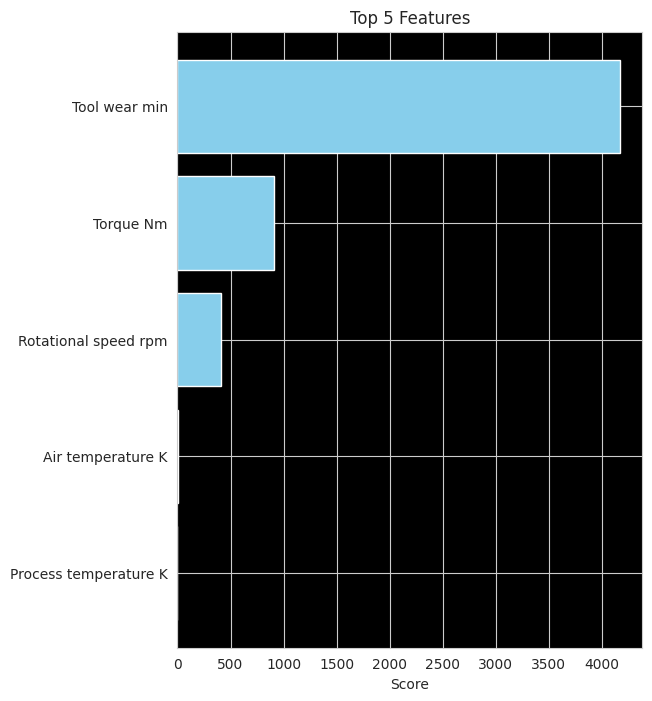

In [34]:
best_features = SelectKBest(score_func=chi2,k='all')

X = df.iloc[:, :-1]
y = df.iloc[:, -1]
fit = best_features.fit(X, y)

df_scores = pd.DataFrame(fit.scores_)
df_col = pd.DataFrame(X.columns)

feature_score = pd.concat([df_col, df_scores], axis=1)
feature_score.columns = ['feature', 'score']
feature_score.sort_values(by=['score'], ascending=True, inplace=True)

# Plot using Matplotlib
plt.figure(figsize=(6, 8))
plt.barh(feature_score['feature'][0:6], feature_score['score'][0:6], color='skyblue')
plt.xlabel('Score')
plt.title('Top 5 Features')
plt.show()

In [37]:
!pip3 install statsmodels

ERROR: Could not install packages due to an EnvironmentError: HTTPSConnectionPool(host='files.pythonhosted.org', port=443): Max retries exceeded with url: /packages/34/1f/ab80ddc1ebebe9f7bb18da1cc7ceb96f789809a3381565092c358ff71a72/statsmodels-0.14.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (Caused by ProtocolError('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer')))



In [38]:
import statsmodels.api as sm

Selected_Features = []

def backward_regression(X, y, initial_list=[], threshold_out=0.5, verbose=True):
    """To select feature with Backward Stepwise Regression 

    Args:
        X -- features values
        y -- target variable
        initial_list -- features header
        threshold_out -- pvalue threshold of features to drop
        verbose -- true to produce lots of logging output

    Returns:
        list of selected features for modeling 
    """
    included = list(X.columns)
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f"worst_feature : {worst_feature}, {worst_pval} ")
        if not changed:
            break
    Selected_Features.append(included)
    print(f"\nSelected Features:\n{Selected_Features[0]}")


# Application of the backward regression function on our training data
backward_regression(X, y)



ModuleNotFoundError: No module named 'statsmodels'

In [40]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X.head()

,Air temperature K,Process temperature K,Rotational speed rpm,Torque Nm,Tool wear min
0,298.1,308.6,1551.0,42.8,0.0
1,298.2,308.7,1408.0,46.3,3.0
2,298.1,308.5,1498.0,49.4,5.0
3,298.2,308.6,1433.0,39.5,7.0
4,298.2,308.7,1408.0,40.0,9.0


In [41]:
feature_names = list(X.columns)
print(feature_names)
np.shape(X)

['Air temperature K', 'Process temperature K', 'Rotational speed rpm', 'Torque Nm', 'Tool wear min']


(10000, 5)

In [42]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [43]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [45]:
# Predictions and evaluation
y_pred = model.predict(X_test)

# Predict probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Set a new threshold
threshold = 0.45 
y_pred_new = (y_pred_proba >= threshold).astype(int)

Confusion Matrix:
[[1927    5]
 [  22   46]]
Classification Report:
              precision    recall  f1-score   support

         0.0     0.9887    0.9974    0.9930      1932
         1.0     0.9020    0.6765    0.7731        68

    accuracy                         0.9865      2000
   macro avg     0.9453    0.8369    0.8831      2000
weighted avg     0.9858    0.9865    0.9856      2000

ROC AUC Score: 97.56%
Accuracy: 98.65%
Recall: 98.65%
Precision: 98.58%
F1-Score: 98.56%
MCC: 77.47%


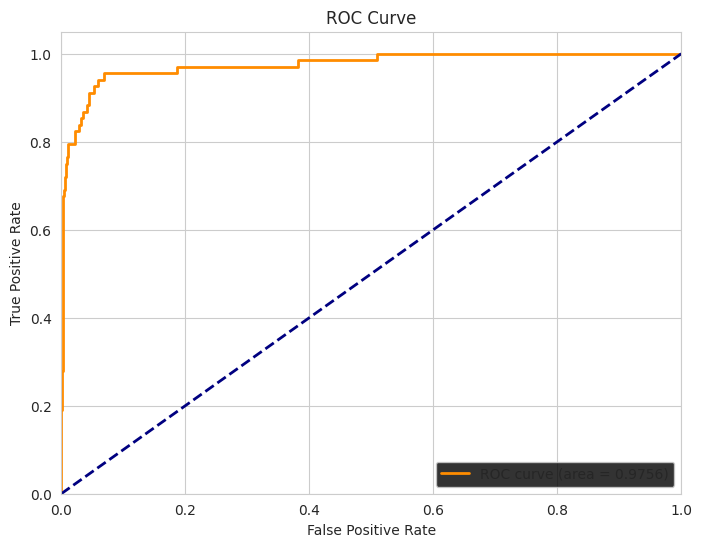

In [46]:
conf_matrix_new = confusion_matrix(y_test, y_pred_new)
class_report_new = classification_report(y_test, y_pred_new, digits=4)
roc_auc_new = roc_auc_score(y_test, y_pred_proba, average='weighted')
accuracy = accuracy_score(y_test, y_pred_new)
recall = recall_score(y_test, y_pred_new, average='weighted')
precision = precision_score(y_test, y_pred_new, average='weighted')
f1s = f1_score(y_test, y_pred_new, average='weighted')
mcc = matthews_corrcoef(y_test, y_pred_new)

# Print metrics
print(f"Confusion Matrix:\n{conf_matrix_new}")
print(f"Classification Report:\n{class_report_new}")
print(f"ROC AUC Score: {roc_auc_new:.2%}")
print(f"Accuracy: {accuracy:.2%}")
print(f"Recall: {recall:.2%}")
print(f"Precision: {precision:.2%}")
print(f"F1-Score: {f1s:.2%}")
print(f"MCC: {mcc:.2%}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6), facecolor='white')
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.gca().set_facecolor('white')
plt.show()